#### sklearn.ensemble.RandomForestClassifier
* class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

feature_name_df = pd.read_csv('./datasets/UCI HAR Dataset/features.txt',sep=' ' , header=None , names=['column_index', 'column_name'])
feature_name = feature_name_df.iloc[:, 1].tolist()
# feature_name

In [9]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                 columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+
                                                                                              str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [10]:
get_new_feature_name_df(feature_name_df)

,column_index,column_name,dup_cnt
0,1,tBodyAcc-mean()-X,0
1,2,tBodyAcc-mean()-Y,0
2,3,tBodyAcc-mean()-Z,0
3,4,tBodyAcc-std()-X,0
4,5,tBodyAcc-std()-Y,0
...,...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)",0
557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,559,"angle(X,gravityMean)",0
559,560,"angle(Y,gravityMean)",0


In [11]:
import pandas as pd
def get_human_dataset():
    # 각 데이터 파일이 공백으로 분리되어 있어, 공백문자를 sep로 할당
    feature_name_df = pd.read_csv('./datasets/UCI HAR Dataset/features.txt', sep=' ',
                                 header=None, names=['column_index', 'column_name'])
    # 중복 이름 변경
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    x_train = pd.read_csv('./datasets/UCI HAR Dataset/train/X_train.txt', sep='\s+', names=feature_name)
    # print(x_train)
    x_test = pd.read_csv('./datasets/UCI HAR Dataset/test/X_test.txt', sep='\s+', names=feature_name)
    
    y_train = pd.read_csv('./datasets/UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./datasets/UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    return x_train, x_test, y_train, y_test

In [12]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=42)

# RandomForest
param_rf = {"max_depth" : [5,7,10,16,20,25],
          "min_samples_split" : [2,3]
          }

gscv_dt = GridSearchCV(estimator = rf_clf, param_grid = param_rf, scoring ='accuracy', cv = 3, refit=True, n_jobs=1, verbose=0)

gscv_dt.fit(X_train , y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [5, 7, 10, 16, 20, 25],
                         'min_samples_split': [2, 3]},
             scoring='accuracy')

In [15]:
gscv_dt.best_params_

{'max_depth': 7, 'min_samples_split': 2}

In [16]:
gscv_dt.best_score_

0.9148543562671906

In [17]:
rf_clf = RandomForestClassifier( random_state=42)

rf_clf.fit(X_train , y_train)

RandomForestClassifier(random_state=42)

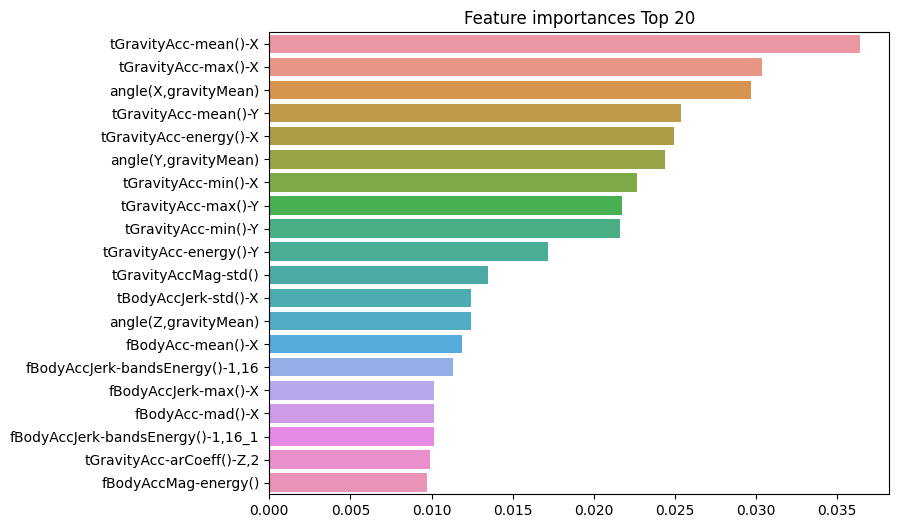

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

In [22]:
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
list(ftr_top20.index)

['tGravityAcc-mean()-X',
 'tGravityAcc-max()-X',
 'angle(X,gravityMean)',
 'tGravityAcc-mean()-Y',
 'tGravityAcc-energy()-X',
 'angle(Y,gravityMean)',
 'tGravityAcc-min()-X',
 'tGravityAcc-max()-Y',
 'tGravityAcc-min()-Y',
 'tGravityAcc-energy()-Y',
 'tGravityAccMag-std()',
 'tBodyAccJerk-std()-X',
 'angle(Z,gravityMean)',
 'fBodyAcc-mean()-X',
 'fBodyAccJerk-bandsEnergy()-1,16',
 'fBodyAccJerk-max()-X',
 'fBodyAcc-mad()-X',
 'fBodyAccJerk-bandsEnergy()-1,16_1',
 'tGravityAcc-arCoeff()-Z,2',
 'fBodyAccMag-energy()']

In [25]:
feature_selected_train = X_train[list(ftr_top20.index)]

In [26]:
feature_selected_test =X_test[list(ftr_top20.index)]